## Supervised Learning Algorithms - Linear Regression: Assume the dataset to Create a Simple Linear Regression model. Predict the scores on the test data and output RMSE and R Squared Score. Include appropriate code snippets to visualize the model. Interpret the result.

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score
import pandas as pd 
import matplotlib.pyplot as plt 

In [62]:
df = pd.read_csv("advertising.csv")
df.drop(columns=df.columns[0], inplace=True)

df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [67]:
y = df["sales"]

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [81]:
def plot_distributions(field: str, color: str):
    X = df[[field]]
    plt.figure(figsize=(8, 6))
    plt.title(f"{field} expenditure vs Sales")
    plt.xlabel(f"{field} expenditure")
    plt.ylabel("Sales")
    
    plt.scatter(X, y, marker="o", color=color)
    plt.grid()

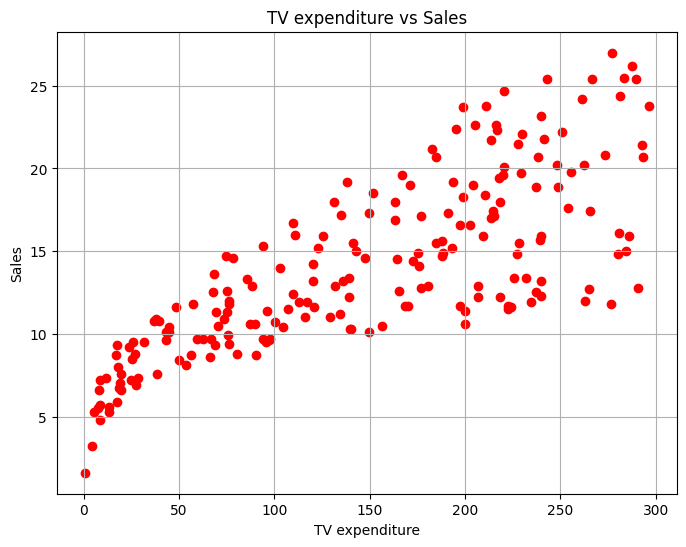

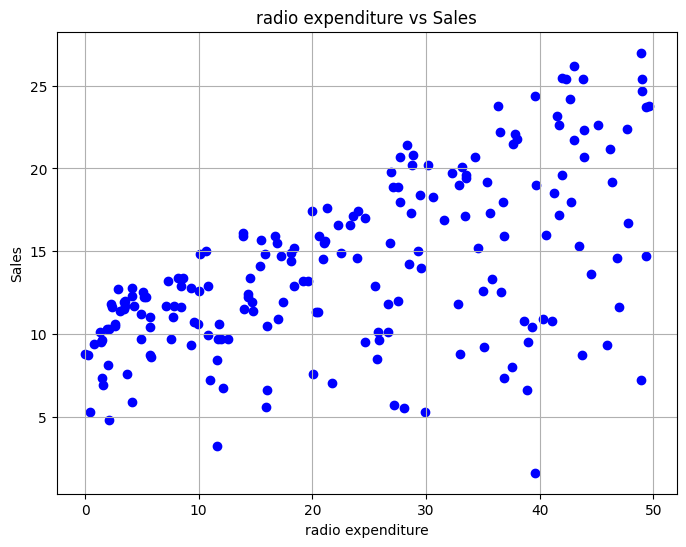

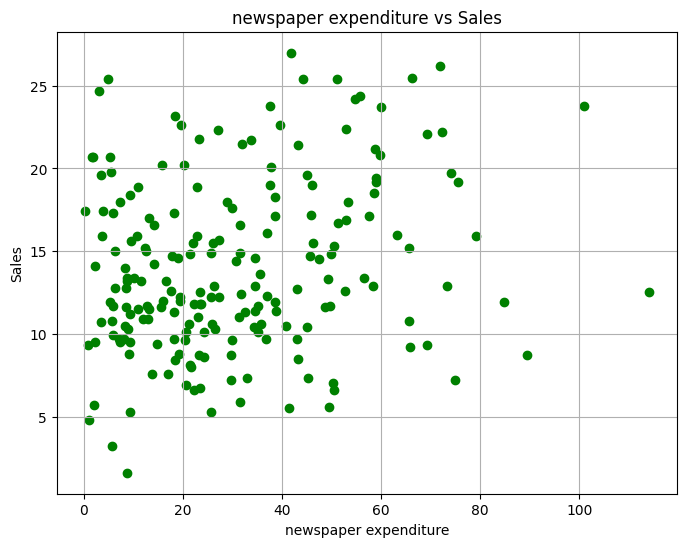

In [82]:
plot_distributions("TV", "red")
plot_distributions("radio", "blue")
plot_distributions("newspaper", "green")

In [90]:
def plot_regression_line_and_print_metrics(field: str, color: str):
    model = LinearRegression()

    X = df[[field]]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    plt.figure(figsize=(8, 6))
    plt.title(f"{field} Regression Results")
    plt.xlabel(f"{field} Expenditure")
    plt.ylabel(f"Sales")

    plt.scatter(X_test, y_test, color=color, marker="*", label="Test Data")
    plt.plot(X_test, y_pred, color="black", linestyle="--", label="Regression Curve")

    plt.legend()
    plt.grid()

    print(f"RMSE of {field} model: {root_mean_squared_error(y_pred, y_test)}")
    print(f"r^2 error of {field} model: {r2_score(y_pred, y_test)}")

RMSE of TV model: 3.0297357261648736
r^2 error of TV model: 0.43100480902944716
RMSE of radio model: 4.451787744912085
r^2 error of radio model: -1.2192121971676522
RMSE of newspaper model: 5.199566461555719
r^2 error of newspaper model: -12.186755231264844


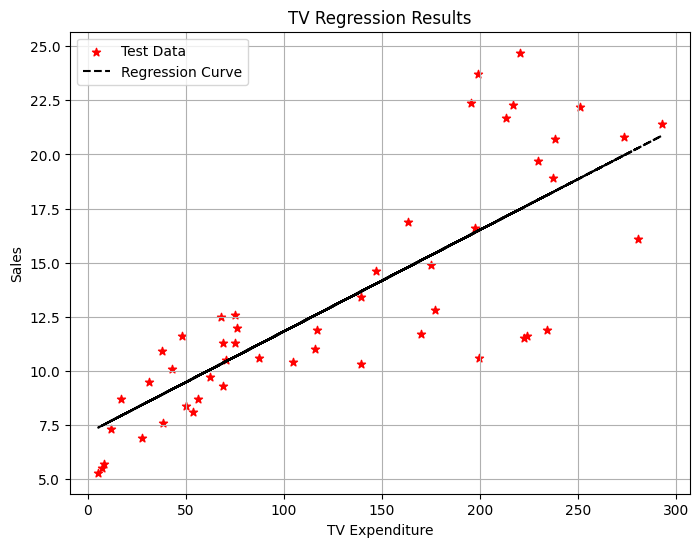

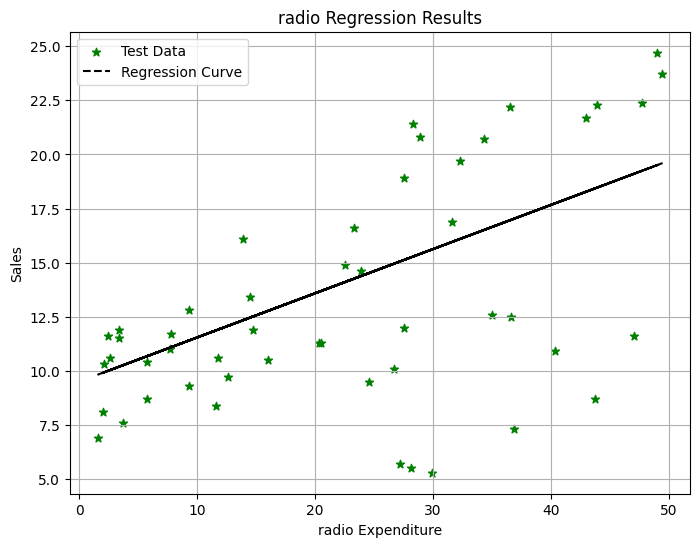

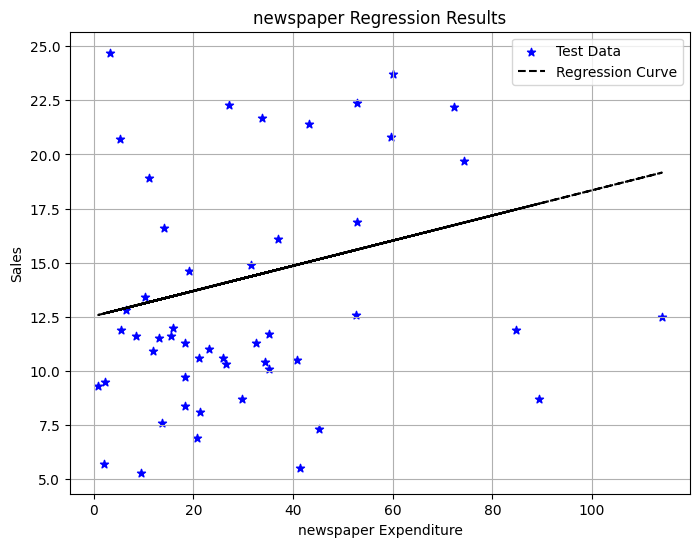

In [91]:
plot_regression_line_and_print_metrics("TV", "red")
plot_regression_line_and_print_metrics("radio", "green")
plot_regression_line_and_print_metrics("newspaper", "blue")